Notebook 3, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2020-08-26, G. Conti, S. Haug, University of Bern. 

# Parameter estimation / regression

**Average expected study time :** 3x45 min (depending on your background)

**Learning outcomes :**

- Know what is meant with parameter estimation and regression
- Perform linear regression with Python by example
- Perform non-linear regression with Python by example
- Know what non-parametric regression is 
- Perform linear regression with Python scikit-learn by example
...

**Main python modules used**
- the Scipy.stat module https://docs.scipy.org/doc/scipy/reference/stats.html
- the Scikit-learn module

If you run this notebook on google colab, you will (probably) have no problems with importing the modules.

## What you should for your uncertainties

When you have a data analysis project, you need to define the final numbers and plots you want to produce. In order to control your uncertaines, you should maintain a list/table with the largest uncertainties and their effect on the final number(s) as percentages.  

# 3. Situation

We have data and want to extract model paramters from that data. An example would be to estimate the mean and the standard deviation, assuming a normal distribution. Another one would be to fit a straight line. For historical reasons this kind of analysis is often called regression. Some scientists just say fitting (model parameters to the data).

We distinguish between parametric and non-parametric models. A line and the normal distribution are both parametric.

## 3.1 About linear Regression

Linear regression means fitting a straight line to data a set of points (x,y). You may consider this as the simplest case of Machine Learning (see Module 3). A line is described as

$$y = ax + b$$

Thus two parameters a (slope) and b (intersection with y axis) are fitted.

There are different fitting methods, mostly least squares or maximum likelihood are used. See the lecture for some introduction to these two methods. 


## Linear regression in Python

Import the Python libraries we need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

Read the data from file and do a linear regression for a line in the plength-pwidth space of the setosa sample. We use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html, using least squares. 

In [2]:
df = pd.read_csv('iris.csv',names=['slength','swidth','plength','pwidth','species'])
#df_set = df[df['species']=='Iris-versicolor']
df_set = df[df['species']=='Iris-setosa']
plengths = df_set['plength']
pwidths  = df_set['pwidth']
slope, intercept, r_value, p_value, std_err = stats.linregress(plengths,pwidths)
print (slope, intercept, std_err)

FileNotFoundError: ignored

The number of digits is ridiculous. Let's print it better.

In [ ]:
print ('Gradient = %1.2f +- %1.2f' % (slope,std_err))

Let's look at the scatter plot to see if this makes sense.

In [ ]:
ax = df_set.plot(x='plength',y='pwidth',kind="scatter",c='c')
plt.plot(plengths, intercept + slope*plengths, 'b', label='Fitted treated line')
plt.show()

By eye it is hard to say how good this fit is. Try the same regression  with versicolor. The result may be a bit clearer.

We now have a model, a straight line, whose shape we have chosen, but whose parameters (slope and intersection) have been estimated/fitted from data with the least squares method. It tells us that pwidth of a leaf is plength x slope ( f(plength) = a x slope). So we can do interpolation and extrapolation, i.e. get the pwidth at any plength.




### Example Exponential p.d.f.

With scale $\beta$ and location $\mu$

$$f(x)=\frac{1}{\beta} e^{-(x-\mu)/\beta}     ,  x \ge \mu;\beta>0$$

In [ ]:
# Let us fit data to an exponential distribution
fig, ax = plt.subplots(1, 1)
# First generate a data set from a exponential distribution
x = stats.expon.rvs(0.0,0.5,size=100) #  scale = 0.5, location = 0.00, 1000 variates
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
# Fit scale and location to the histogram/data
loc, scale = stats.expon.fit(x) # ML estimator scale, lambda * exp(-lambda * x), scale =1/lambda
print(' Location = %1.2f , Scale = %1.2f' % (loc,scale)) 
plt.show()

This fit method is poor in the sense that it doesn't return uncertainties on the fitted values. This we normally want to know. The curve_fit method below also returns the uncertainties.

## 3.2 Non-linear regression

If a line is not streight it is curved. There are many mathematical functions whose parameters we can try to fit to experimental data points. Some examples: Polynominals (first order is linear regression, second order is a parabola etc), exponential functions, normal function, sindoial wave function etc. You need to choose an approriate shape/function to obtain a good result. 

With the Scipy.stat module we can look for preprogrammed functions (in principle you can program your own function whose parameters you want to fit too): https://docs.scipy.org/doc/scipy/reference/stats.html. 

The scipy.optimize module provides a more general non-linear least squares fit. Look at and play with this example. It is complex and you will probably use at least an hour testing, googling etc.

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50) # 
y = func(xdata, 2.5, 1.3, 0.5)
plt.plot(xdata, y, 'g-', label='Generated data')
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='Generated data with noise')
plt.show()

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
plt.plot(xdata, func(xdata, *popt), 'r-',label= \
         'fit: a=%5.3f +- %5.3f, \n b=%5.3f +- %5.3f, \n c=%5.3f +-%5.3f' % \
         (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
perr

# 3.3 Non-parametric regression

So far we have used functions (models) with some predefined shape/form. The parameters we fitted to data. If we have no clue about the form, we may try to fit with non-parametric methods. However, these require more data as also the shape needs to guessed or fitted from the data. So normally a non-parametric method gives poorer results. 

There are several ways to do this in Python. You make look at this if you are interested:

https://pythonhosted.org/PyQt-Fit/NonParam_tut.html

# 3.4 Fitting with scikit-learn

When it comes to machine learning, the `scikit-learn` module is much richer than the stats module. You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface. 

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model.
3. `y_pred = fitter.predict(X)`: Predict using the linear model.
4. `s = fitter.score(x, y[, sample_weight])`: Return an appropriate measure of model performance.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using another regression/classification object, while the rest of the code can remain the same.


In [3]:
# Let's write a method which can generate a linear dataset
# with n_d dimensions and some gaussian noise to it
import numpy as np
import matplotlib.pyplot as plt

def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))
  
  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true w =', w, ';  b =', b)

  return x, y

true w = [3.32554581] ;  b = -9.98442190732253


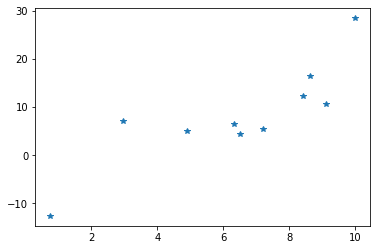

In [7]:
# Sample data from a straight line with noise to it 
x, y = get_linear(n_d=1)
plt.plot(x[:, 0], y, '*')

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[3.03080526] -11.224157674809032


scikit-learn does not support calculation of covariance on fitted parameters. That is a pity maybe. However, we can use numpy vectorized methods.


In [24]:
np.std(y - reg.predict(x))

5.259432028668771

In [23]:
(np.cov(y - reg.predict(x)))**0.5

5.543928136477771

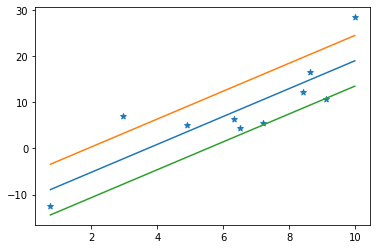

In [26]:
# Plot the fitted model with plus minus one standard deviation.
# Are the data points distributed as expected?
plt.scatter(x, y, marker='*')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f)
plt.plot(x_f, y_f+5.5)
plt.plot(x_f, y_f-5.5)

true w = [9.85108852 9.80776079] ;  b = 6.091101686739606


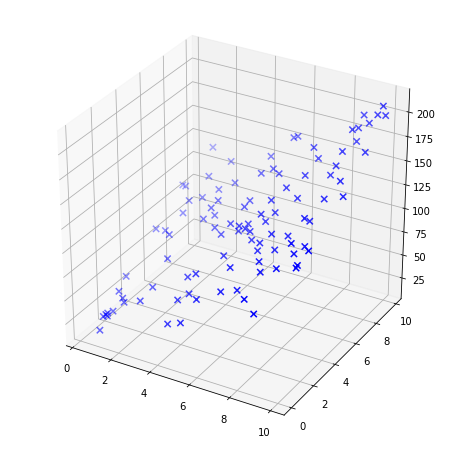

In [6]:
# Generate data points from a plane with some noise to it (default) 
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=40)

In [19]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

true w = [6.95512008 2.88548131] ;  b = 4.516794503786359


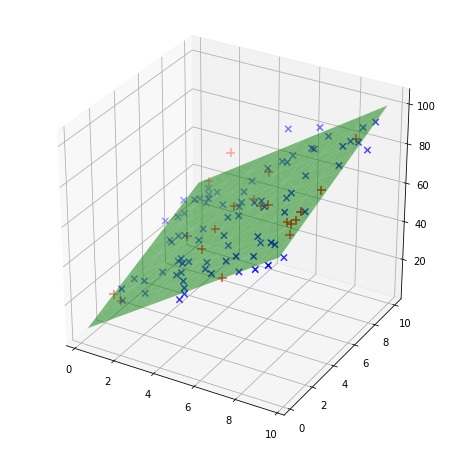

In [28]:
# When doing ML, it is recommended to split the dataset into a training
# and a test set. The training set is used to learn the parameters. The 
# test set can be used to assess the performance of the trained model 
# (overfitting and underfitting). sklearn provides a helpful method doing that. 

from sklearn.model_selection import train_test_split

n_d = 2
x, y = get_linear(n_d=n_d, n_points=100, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', color='b',s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', color='r',s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.5, color='g');

In [45]:
np.std(y-reg.predict(x))

4.84536819834455

## End of notebook

We have now seen how to do linear regression with several python
modules. The most popular ML models are implemented in sklearn. We don't have time practicing them in this CAS. In Module 3 we will learn and practice deep neural networks.

Please post a question about today's content here:

https://forms.gle/nwun9FNZRTTfeP2HA

Many thanks and see you tomorrow !
